<h1>Ventas en Publicidad</h1>

Crear y evaluar un modelo de **regresión lineal múltiple** para predecir las ventas con datos simulados de una empresa dependiendo de las inversiones realizadas en publicidad.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# load dataset
# col_names = ['ID', 'X', 'TV', 'Radio', 'Newspaper', 'Web', 'Sales']
# datos = pd.read_csv("communication - Advertising_Web.csv", header=0, names=col_names)
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")

In [45]:
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


In [46]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


Se describen las variables independientes: *TV, Radio, Newspaper* y *Web*.

Se describe la variable dependiente *Sales*: significa el volumen de ventas del producto correspondiente.

Para un solo producto en un mercado determinado, el costo de la publicidad, en miles, de las variables independientes:

-**TV**: costos de publicidad invertidos en TV.

-**Radio**: costos de publicidad invertidos en radio.

-**Periódico**: costos de publicidad invertidos en medios periodísticos.

-**Web**: costos de publicidad invertidos en páginas web.

In [47]:
datos.describe()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,100.500000,147.042500,23.264000,30.554000,159.587355,14.022500
std,57.879185,57.879185,85.854236,14.846809,21.778621,76.815266,5.217457
min,1.000000,1.000000,0.700000,0.000000,0.300000,4.308085,1.600000
25%,50.750000,50.750000,74.375000,9.975000,12.750000,99.048767,10.375000
50%,100.500000,100.500000,149.750000,22.900000,25.750000,156.862154,12.900000
75%,150.250000,150.250000,218.825000,36.525000,45.100000,212.311848,17.400000
max,200.000000,200.000000,296.400000,49.600000,114.000000,358.247042,27.000000


In [48]:
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


In [49]:
datos.tail()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5
199,200,200,232.1,8.6,8.7,151.990733,13.4


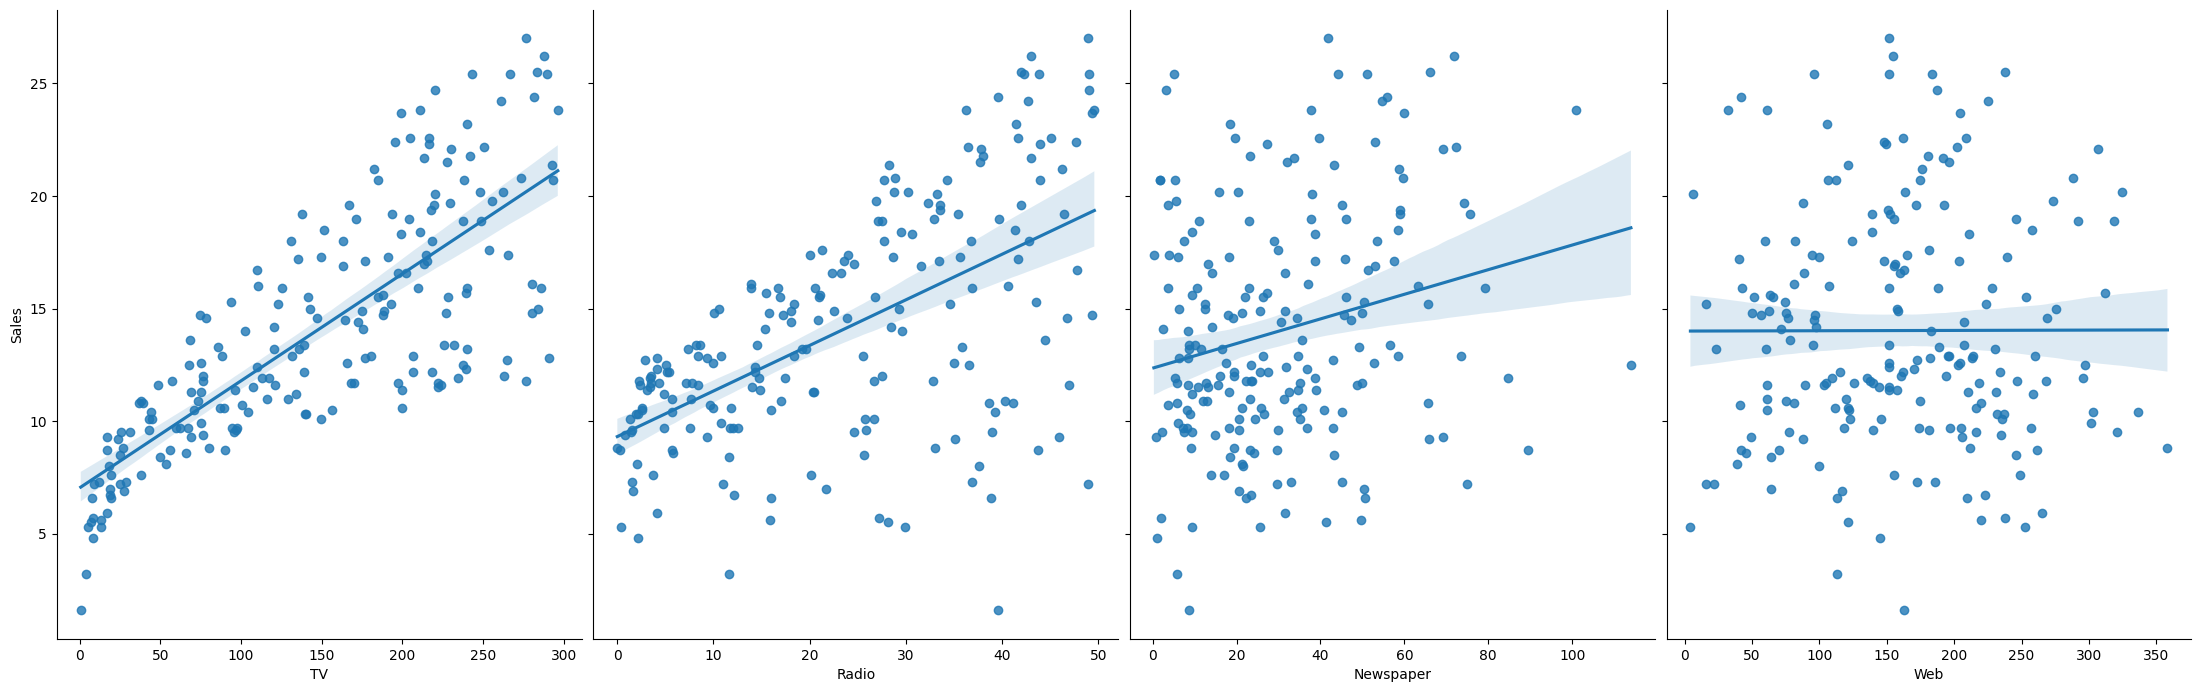

In [50]:
sns.pairplot(datos, x_vars=['TV', 'Radio', 'Newspaper', 'Web'], y_vars='Sales',
             height=7, aspect=0.8, kind = 'reg')
plt.xlabel("Web")
plt.ylabel("Sales")
plt.show()

Se muestra las relaciones lineales entre las variables independientes con respecto a *Sales*.

Es posible estimar visualmente que la variable *Newspaper* tal vez tenga poco impacto en las *Sales*, esto por la alta dispersión de los datos. Sin embargo participará en el modelo de regresión lineal múltiple.

Se observa también que la variable *Web* tiene poca correlación lineal con la variable *Sales*.

In [51]:
# creamos un dataset con las variables predictoras
X_independientes = datos.iloc[:,2:6]
X_independientes.head()

,TV,Radio,Newspaper,Web
0,230.1,37.8,69.2,306.634752
1,44.5,39.3,45.1,302.653070
2,17.2,45.9,69.3,49.498908
3,151.5,41.3,58.5,257.816893
4,180.8,10.8,58.4,195.660076


In [52]:
# aislamos la variable respuesta
Y_dependiente = datos.iloc[:, 6:7]
Y_dependiente.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [53]:
#crear matriz de correlación
corr = datos.corr()
corr.style.background_gradient()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
Unnamed: 0,1.000000,1.000000,0.017715,-0.110680,-0.154944,-0.052173,-0.051616
X,1.000000,1.000000,0.017715,-0.110680,-0.154944,-0.052173,-0.051616
TV,0.017715,0.017715,1.000000,0.054809,0.056648,0.012576,0.782224
Radio,-0.110680,-0.110680,0.054809,1.000000,0.354104,-0.122673,0.576223
Newspaper,-0.154944,-0.154944,0.056648,0.354104,1.000000,-0.057759,0.228299
Web,-0.052173,-0.052173,0.012576,-0.122673,-0.057759,1.000000,0.002108
Sales,-0.051616,-0.051616,0.782224,0.576223,0.228299,0.002108,1.000000


In [54]:
#se construye el modelo de regresión
modelo_rm = LinearRegression()
modelo_rm.fit(X_independientes, Y_dependiente)

LinearRegression()

In [55]:
# obtener coeficientes del modelo
# intercepto
print(modelo_rm.intercept_)

[2.2442222]


In [56]:
# coeficientes de regresión
print(modelo_rm.coef_)

[[ 0.04569278  0.19097499 -0.00079352  0.00401598]]


Predicción: 

$$
Y=b_0+b_1⋅x_1+b_2⋅x_2+b_3⋅x_3+b_3⋅x_4
$$

Predicción de *Sales*: 

$$
\text{Sales}=b_0+b_1⋅\text{TV}+b_2⋅\text{Radio}+b_3⋅\text{Newspaper}+b_4⋅\text{Web}
$$

In [57]:
# definir matriz de diseño y variable respuesta
X = X_independientes
y = Y_dependiente

# añadir intercepto
X2 = sm.add_constant(X)

# ajustar el modelo
est = sm.OLS(y, X2)

# ver ajuste
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     441.9
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           1.48e-96
Time:                        13:42:05   Log-Likelihood:                -382.78
No. Observations:                 200   AIC:                             775.6
Df Residuals:                     195   BIC:                             792.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2442      0.407      5.509      0.0

In [58]:
print("Predicción: ", modelo_rm.predict ([[296.400000, 49.600000, 114.000000, 358.247042]]))

Predicción:  [[26.608175]]


c:\software\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
predicciones = modelo_rm.predict(X_independientes)

In [60]:
comparaciones = pd.DataFrame(X_independientes)
comparaciones = comparaciones.assign(Sales_Real = Y_dependiente)
comparaciones = comparaciones.assign(Sales_Predicho = predicciones.flatten().tolist())
comparaciones.head()

,TV,Radio,Newspaper,Web,Sales_Real,Sales_Predicho
0,230.1,37.8,69.2,306.634752,22.1,21.153514
1,44.5,39.3,45.1,302.653070,10.4,12.962530
2,17.2,45.9,69.3,49.498908,9.3,11.939686
3,151.5,41.3,58.5,257.816893,18.5,18.042913
4,180.8,10.8,58.4,195.660076,12.9,13.307433


In [61]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_dependiente, predicciones))

Mean Squared Error: MSE 2.690921581107243


In [62]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_dependiente, predicciones)))

Root Mean Squared Error RMSE: 1.6404028715858927


In [63]:
# Variance Inflation Factor
# crear dataframe para aplicar VIF
VIF = pd.DataFrame()
VIF["variable"] = X_independientes.columns

In [64]:
# aplicar el método
VIF["VIF"] = [variance_inflation_factor(X_independientes.values, i)
                  for i in range(len(X_independientes.columns))]

# resultados
VIF

,variable,VIF
0,TV,3.172879
1,Radio,3.427062
2,Newspaper,3.191014
3,Web,3.088313


Fin